# Exploratory Data Analysis of Air Quality Index of Delhi

Air performs a vital role in supporting life on Earth. But with the passage of time the fresh and pure air is gradually    getting contaminated due to increase in air pollution.

Problem of air pollution is increasingly getting more serious. Increasing levels of pollutants in air is causing extreme health disorder. It directly affects a population of millions who are suffering from shortness of breath, eye irritation to chronic respiratory disorders, pneumonia, acute asthma etc.

This study is based on hourly data collected for Delhi state (www.cpcb.nic.in)

We will be doing Exploratory Data Analysis for this data using pandas, numpy, matplotlib and seaborn libraries.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("C:\\Users\\Ankita\\Desktop\\Datasets\\Delhi_AQI.csv")
print(df.head())
date=df.iloc[: ,1]
AQI_bucket=df.iloc[:,-1]

    City      Date   PM2.5    PM10     NO    NO2     NOx     NH3     CO   SO2  \
0  Delhi  1/1/2015  313.22  607.98  69.16  36.39  110.59   33.85  15.20  9.25   
1  Delhi  1/2/2015  186.18  269.55  62.09  32.87   88.14   31.83   9.54  6.65   
2  Delhi  1/3/2015   87.18  131.90  25.73  30.31   47.95   69.55  10.61  2.65   
3  Delhi  1/4/2015  151.84  241.84  25.01  36.91   48.62  130.36  11.54  4.63   
4  Delhi  1/5/2015  146.60  219.13  14.01  34.92   38.25  122.88   9.20  3.33   

      O3  Benzene  Toluene  Xylene    AQI AQI_Bucket  
0  41.68    14.36    24.86    9.84  472.0     Severe  
1  29.97    10.55    20.09    4.29  454.0     Severe  
2  19.71     3.91    10.23    1.99  143.0   Moderate  
3  25.36     4.26     9.71    3.34  319.0  Very Poor  
4  23.20     2.80     6.21    2.96  325.0  Very Poor  


## Descriptive Statistics

In [3]:
df.describe()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
count,2007.000000,1932.000000,2007.000000,2007.000000,2009.000000,2000.000000,2009.000000,1899.000000,1925.00000,2009.000000,2009.000000,1228.000000,1999.000000
mean,117.196153,232.809229,38.985595,50.785182,58.567023,41.997150,1.976053,15.901253,51.32361,3.544480,17.185042,1.438339,259.487744
std,82.912945,121.873025,33.389456,22.696721,37.690350,17.301221,2.560253,7.966770,26.06234,2.431232,15.291597,2.377762,119.537333
min,10.240000,18.590000,3.570000,10.630000,0.000000,6.780000,0.000000,2.340000,6.94000,0.000000,0.000000,0.000000,29.000000
25%,57.095000,137.040000,15.895000,33.895000,31.150000,31.157500,0.910000,10.335000,33.71000,1.870000,6.650000,0.110000,161.500000
50%,94.620000,216.730000,27.200000,47.150000,52.750000,38.040000,1.240000,14.450000,44.44000,2.960000,12.750000,0.650000,257.000000
75%,153.030000,311.667500,50.790000,63.570000,75.360000,48.792500,1.870000,19.700000,60.84000,4.680000,23.200000,1.970000,345.500000
max,685.360000,796.880000,221.030000,162.500000,254.800000,166.700000,30.440000,71.560000,257.73000,20.640000,103.000000,23.300000,716.000000


Here we get PM10 pollutant with highest mean (232.8) which shows that for poor air quality of Delhi PM10 is the most responsible pollutant present in the air.

## Data Cleaning

we have to clean the dataset to start the Exploratory Data Analysis.

AxesSubplot(0.125,0.125;0.775x0.755)


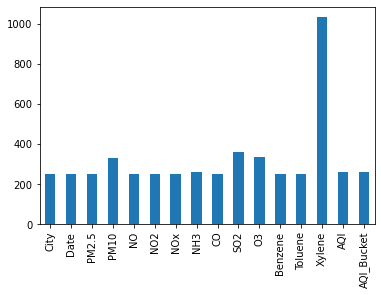

In [4]:
print(df.isnull().sum().plot(kind='bar'))

In [5]:
print(df.shape)

(2260, 16)


In [6]:
# Importing the SimpleImputer class
from sklearn.impute import SimpleImputer

AxesSubplot(0.125,0.125;0.775x0.755)


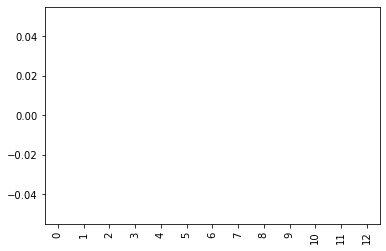

In [7]:
imputer = SimpleImputer(missing_values=np.nan, strategy='median')
df1=df.iloc[: ,2:15]
df1= imputer.fit_transform(df1)
df1=pd.DataFrame(df1)
print(df1.isnull().sum().plot(kind='bar'))

Our dataset is now clean with no null values.

In [8]:
df1.loc[:,"Date"]=date
df1.loc[:,"AQI_bucket"]=AQI_bucket
df1.columns=['PM2.5','PM10','NO','NO2','NOX','NH3','CO','SO2','O3','Benzene','Toluene','Xylene','AQI','Date','AQI_bucket']
print(df1.head())

    PM2.5    PM10     NO    NO2     NOX     NH3     CO   SO2     O3  Benzene  \
0  313.22  607.98  69.16  36.39  110.59   33.85  15.20  9.25  41.68    14.36   
1  186.18  269.55  62.09  32.87   88.14   31.83   9.54  6.65  29.97    10.55   
2   87.18  131.90  25.73  30.31   47.95   69.55  10.61  2.65  19.71     3.91   
3  151.84  241.84  25.01  36.91   48.62  130.36  11.54  4.63  25.36     4.26   
4  146.60  219.13  14.01  34.92   38.25  122.88   9.20  3.33  23.20     2.80   

   Toluene  Xylene    AQI      Date AQI_bucket  
0    24.86    9.84  472.0  1/1/2015     Severe  
1    20.09    4.29  454.0  1/2/2015     Severe  
2    10.23    1.99  143.0  1/3/2015   Moderate  
3     9.71    3.34  319.0  1/4/2015  Very Poor  
4     6.21    2.96  325.0  1/5/2015  Very Poor  


## EDA

## How AQI Bucket list is distributed?

In [9]:
#AQI Bucket list we have
df1['AQI_bucket'].value_counts()

Poor            542
Very Poor       520
Moderate        519
Severe          239
Satisfactory    158
Good             21
Name: AQI_bucket, dtype: int64

<AxesSubplot:xlabel='AQI_Bucket', ylabel='count'>

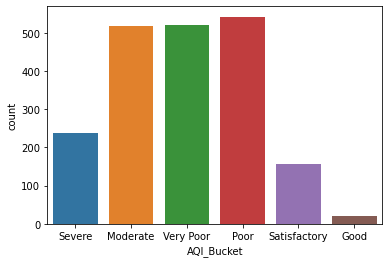

In [10]:
sns.countplot(x=df.iloc[:,-1],data=df1)

There are six AQI categories, namely Good, Satisfactory, moderately polluted, Poor, Very Poor, and Severe.

Most of the observations lie under Moderate, Poor, Very Poor region ( which is serious matter of concern).

Very few observations are falls under Good air quality, which means most of the time air of Delhi is highly polluted.

## How AQI is distributed?

C:\Users\Ankita\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='AQI', ylabel='Density'>

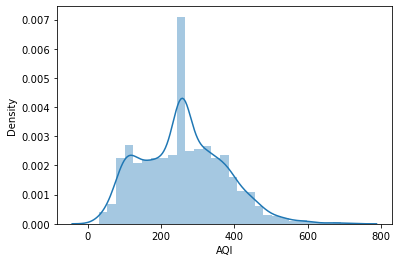

In [11]:
sns.distplot(df1['AQI'],kde=True,hist=True)

<AxesSubplot:xlabel='PM2.5', ylabel='AQI'>

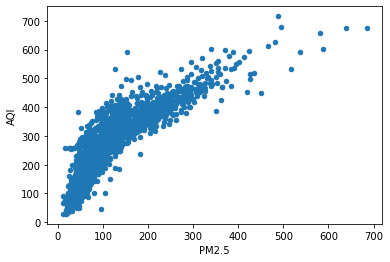

In [12]:
df1.plot(kind='scatter',x='PM2.5',y='AQI')

PM2.5 directly affecting the AQI value. 
Higher the concentration of PM2.5 in the atmosphere poorer the quality of air is.
PM2.5 contributing highly for the poor air quality of Delhi.

<AxesSubplot:xlabel='Benzene', ylabel='AQI'>

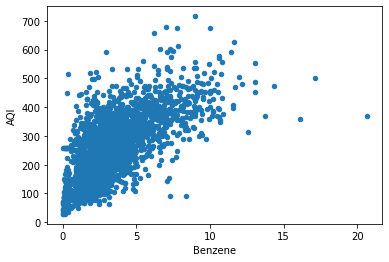

In [13]:
df1.plot(kind='scatter',x='Benzene',y='AQI')

Even if the Benzene concentration is low in the environment,the AQI value is high. So,we can say that Benzene does not affect much in the AQI

<AxesSubplot:xlabel='PM2.5', ylabel='PM10'>

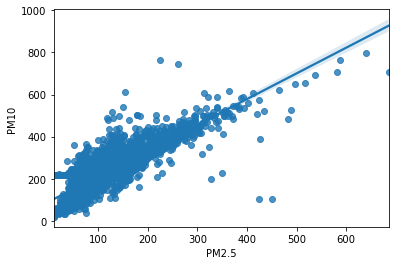

In [14]:
sns.regplot(x='PM2.5',y='PM10',data=df1,scatter=True,fit_reg=True)

PM10 and PM2.5 are correlated, as concentration of PM2.5 increases the concentraion of PM10 also increases.

### How each pollutant affects AQI ?

<AxesSubplot:xlabel='O3', ylabel='AQI'>

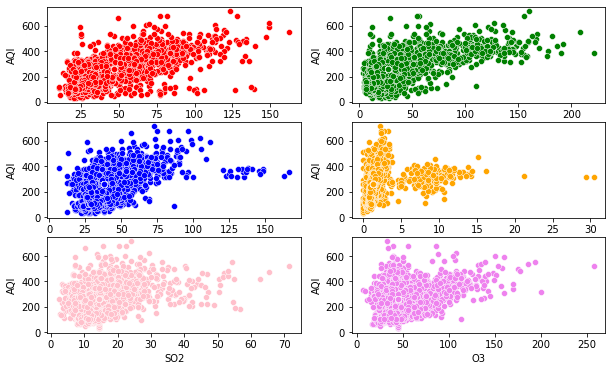

In [15]:
fig,((x1,x2),(x3,x4),(x5,x6))=plt.subplots(nrows=3,ncols=2,figsize=(10,6))
sns.scatterplot(x='NO2',y='AQI',data=df1,color='red',ax=x1)
sns.scatterplot(x='NO',y='AQI',data=df1,color='green',ax=x2)
sns.scatterplot(x='NH3',y='AQI',data=df1,color='blue',ax=x3)
sns.scatterplot(x='CO',y='AQI',data=df1,color='orange',ax=x4)
sns.scatterplot(x='SO2',y='AQI',data=df1,color='pink',ax=x5)
sns.scatterplot(x='O3',y='AQI',data=df1,color='violet',ax=x6)

From the above plots we find that NO2, NO and NH3 are positively correlated with AQI, means as the concentration of        these three pollutants increases in the enviroment, the air becomes more polluted.

CO, SO2 and O3 are not affecting the Air Quality much.

## How Pollutants are correlated?

<AxesSubplot:>

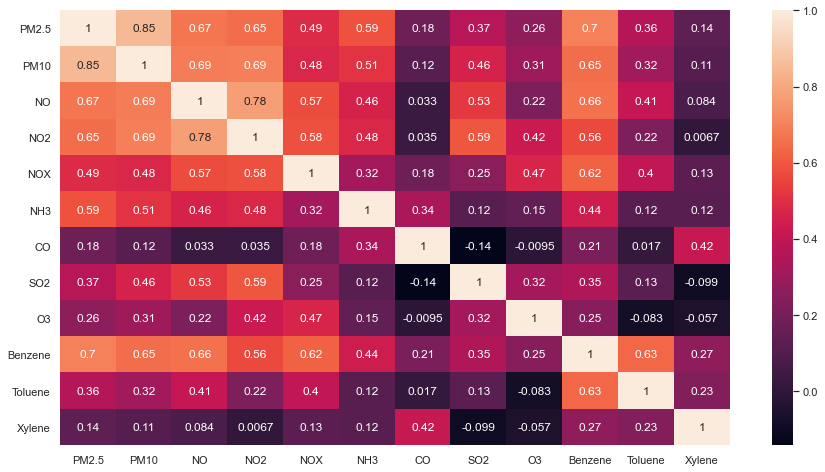

In [20]:
df3=df1.iloc[:,0:12]
sns.set(rc = {'figure.figsize':(15,8)})
sns.heatmap(data=df3.corr(), annot=True)

From the above heatmap we find that PM2.5 and PM10 are highly correlated with correlation coefficient 0.85

 CO, O3, Toulene and xylene are found to be poorely related( or we can say uncorrelated) with other pollutants.